In [166]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
from collections import defaultdict

In [129]:
frames = []

# Load video
video = cv2.VideoCapture('Alex pulse.m4v')

if not video.isOpened():
    raise RuntimeError('Video not open')

while True:
    f, img = video.read()

    # Reached end of video
    if not f:
        break

    frames.append(img)
    
print('Loaded {} frames'.format(len(frames)))

Loaded 482 frames


In [137]:
d = defaultdict(list)

for img in frames:

    image = cv2.resize(img, None, fx=1/3, fy=1/3)

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, c in enumerate('rgb'):
        d[c].append(np.mean(rgb[:,:,i]))

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for i, c in enumerate('hsv'):
        d[c].append(np.mean(hsv[:,:,i]))

df = pd.DataFrame(data=d)
# Zero to compare
df -= df.iloc[0] 

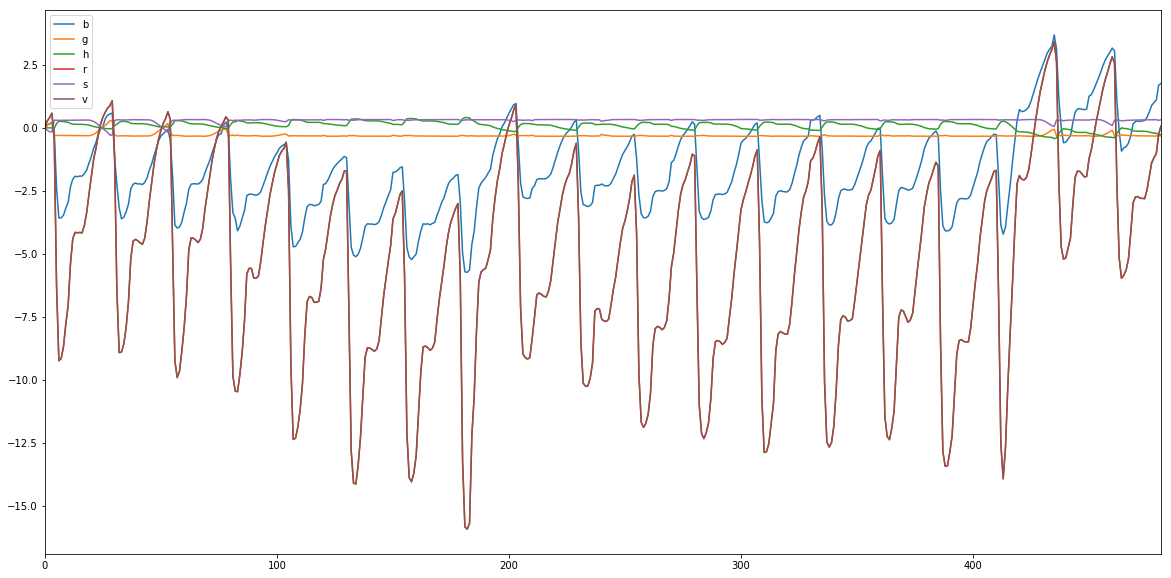

In [138]:
_ = df.plot(figsize=(20, 10))

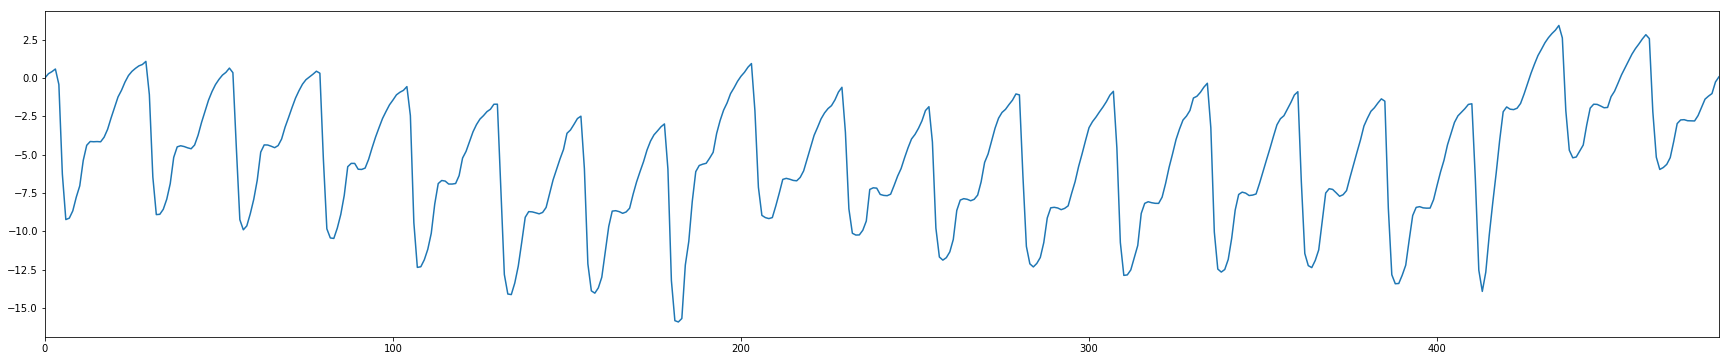

In [139]:
# Just plot Value channel
df.v.plot(figsize=(30,6))

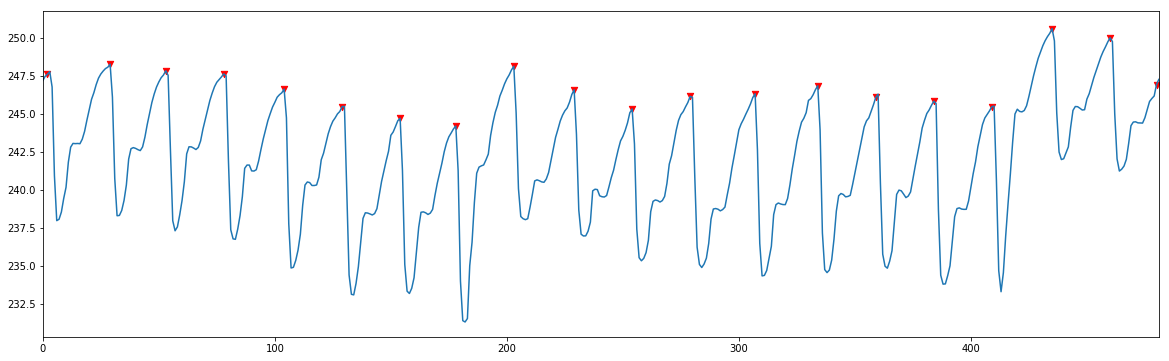

In [133]:
# Peak detection
arr = df.v.as_matrix()
peaks = scipy.signal.find_peaks_cwt(arr, [2])
peaksy = df.v[peaks]
df.v.plot(figsize=(20, 6))
plt.scatter(peaks, peaksy, 40, 'r', 'v')

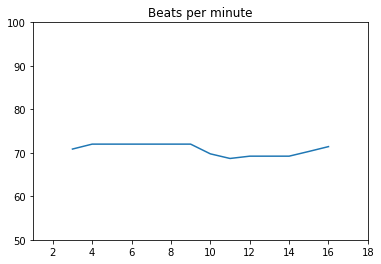

In [170]:
# Rolling mean estimate of bpm 
fps = 30
peak_difference = pd.Series(peaks).diff().dropna()

# Drop outliers (filter to within 3 stdevs from mean)
stdev = peak_difference.std()
mean = peak_difference.mean()
peak_difference = peak_difference[abs((peak_difference - mean) / stdev) < 3]

_ = (60 * fps / peak_difference.rolling(5, center=True).mean()).plot(title='Beats per minute', ylim=[50, 100])

In [172]:
# Average BPM
fpb = peak_difference.mean()
int(60 * fps / fpb)

70